In [1]:
import numpy as np
from matplotlib import  pylab as plt
import os
np.random.seed(42)
from sklearn.datasets import make_blobs

In [2]:
#构造5个中心点,以及样本
blob_centers = np.array (
    [
        [0.2,2.3],
        [-1.5,2.3],
        [-2.8,1.8],
        [-2.8,2.8],
        [-2.8,1.3]
    ]
)
blob_std = np.array([0.4,0.3,0.1,0.1,0.1])
X,y = make_blobs(n_samples=2000,centers=blob_centers,cluster_std=blob_std,random_state=7)

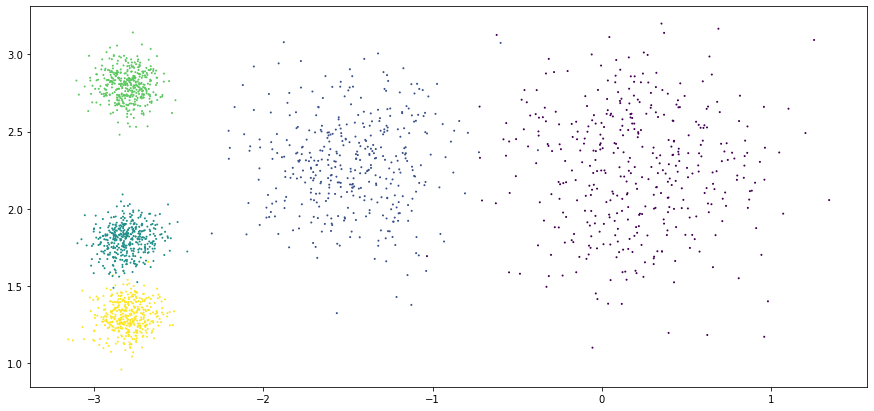

In [3]:
def plot_clusters(X,y=None):
    plt.scatter(X[:,0],X[:,1],c=y,s=1)
plt.figure(figsize=(15,7))
plot_clusters(X,y)
plt.show()

In [4]:
from sklearn.cluster import  KMeans

In [5]:
kmeans = KMeans(5,random_state=42)
y_pre = kmeans.fit_predict(X)#得到预测结果
kmeans.labels_#与预测结果一直

array([4, 0, 1, ..., 2, 1, 0])

In [6]:
kmeans.cluster_centers_#得到中心点

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [7]:
X_new = np.array(
    [[0,2],[3,2],[-3,3],[-3,2.5]]
)

In [8]:
kmeans.predict(X_new)

array([1, 1, 2, 2])

(1000, 1000)


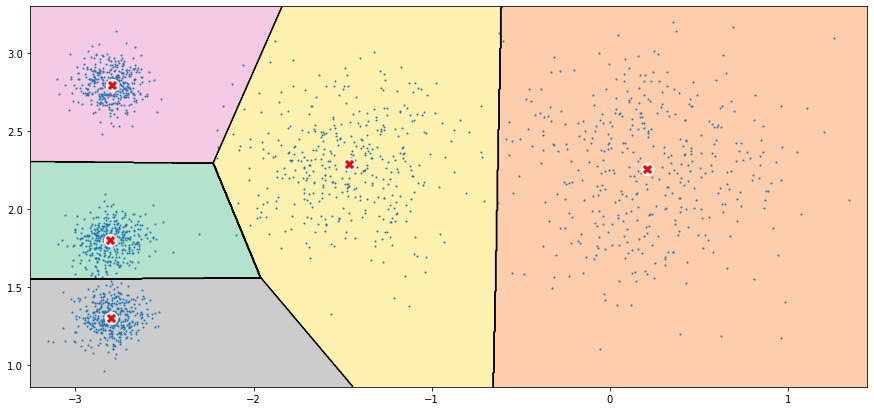

In [9]:
#显示蔟
def plot_clusters(X,y=None):
    plt.scatter(X[:,0],X[:,1],c=y,s=1)


#
def plot_centers(centroids,weight=None,circle_color='w',cross_color='r'):
    if weight is not None:
        centroids = centroids[weights > weights.max()/10]
    plt.scatter(centroids[:,0],centroids[:,1],marker='o',s=30,linewidths=8,color=circle_color,zorder=10,alpha =0.9)
    plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=5,linewidths=10,color=cross_color,zorder=11,alpha =1)

def plot_decision(cluster,X,resolution=1000,show_center=True):
    mins = X.min(axis=0)-0.1
    maxs = X.max(axis=0)+0.1
    xx,yy = np.meshgrid(np.linspace(mins[0],maxs[0],resolution),
                        np.linspace(mins[1],maxs[1],resolution)
                        )
    Z=cluster.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
    plt.contourf(Z,extent=(mins[0],maxs[0],mins[1],maxs[1]),cmap='Pastel2')
    plt.contour(Z,extent=(mins[0],maxs[0],mins[1],maxs[1]),linewidths=1,colors='k')
    plot_clusters(X)
    plot_centers(cluster.cluster_centers_)
    print(Z.shape)
plt.figure(figsize=(15,7))
plot_decision(kmeans,X)
plt.show()

In [10]:
#n_init 初始化起始点的次数  max_iter：迭代的次数
K1=KMeans(n_clusters=5,init='random',n_init=1,max_iter=1,random_state=1)
K2=KMeans(n_clusters=5,init='random',n_init=1,max_iter=2,random_state=1)
K3=KMeans(n_clusters=5,init='random',n_init=1,max_iter=3,random_state=1)
K1.fit(X)
K2.fit(X)
K3.fit(X)

KMeans(init='random', max_iter=3, n_clusters=5, n_init=1, random_state=1)

(1000, 1000)
(1000, 1000)
(1000, 1000)
(1000, 1000)
(1000, 1000)


<function matplotlib.pyplot.show(close=None, block=None)>

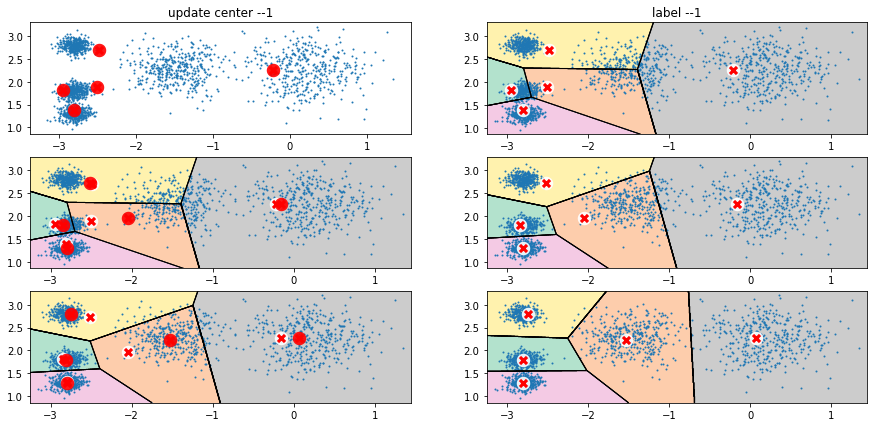

In [11]:
plt.figure(figsize=(15,7))


plt.subplot(321)
plot_clusters(X)
plot_centers(K1.cluster_centers_,circle_color='r')
plt.title(f'update center --1')


plt.subplot(322)
plot_decision(K1,X,show_center=True)
plt.title(f'label --1')

plt.subplot(323)
plot_decision(K1,X,show_center=True)
plot_centers(K2.cluster_centers_,circle_color='r')

plt.subplot(324)
plot_decision(K2,X)

plt.subplot(325)
plot_decision(K2,X,show_center=True)
plot_centers(K3.cluster_centers_,circle_color='r')

plt.subplot(326)
plot_decision(K3,X)

plt.show

In [12]:
def plot_cluster_comprision(c1,c2,X):
    c1.fit(X)
    c2.fit(X)

    plt.figure(figsize=(15,7))
    plt.subplot(121)
    plot_decision(c1,X)
    plt.subplot(122)
    plot_decision(c2,X)
    
    

(1000, 1000)
(1000, 1000)


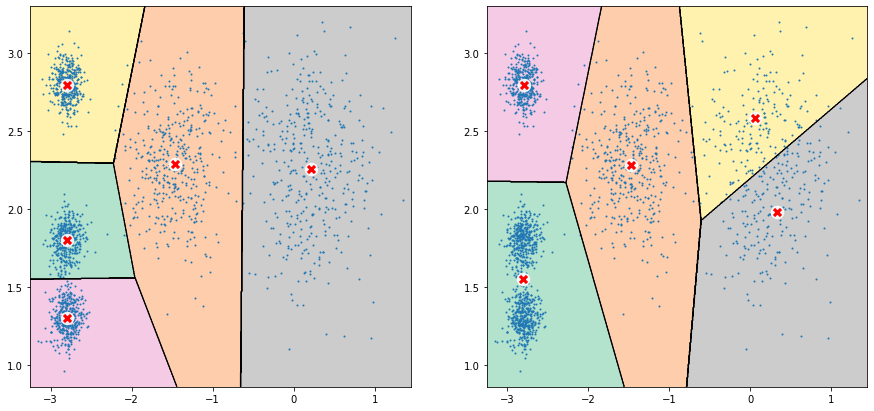

In [13]:
K_p_1 = KMeans(n_clusters=5,init='random',n_init=1,random_state=1)
K_p_2 = KMeans(n_clusters=5,init='random',n_init=1,random_state=2)

plot_cluster_comprision(K_p_1,K_p_2,X)

In [14]:
X_distence = K_p_1.transform(X)
X_distence
kmeans.inertia_

211.59853725816836

In [15]:
X_distence = K_p_1.transform(X)
X_min_dis = X_distence[np.arange(len(X_distence)),K_p_1.labels_]
np.sum(X_min_dis**2)==kmeans.inertia_

False

In [16]:
#方法一
Kmeans_per =  [KMeans(n_clusters=K).fit(X) for K in range(1,10)]
inertias = [model.inertia_ for model in Kmeans_per]

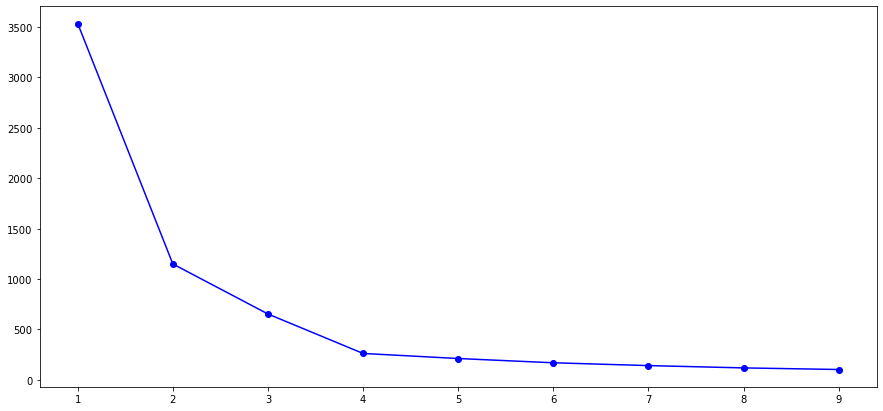

In [17]:
plt.figure(figsize=(15,7))
plt.plot(range(1,10),inertias,'bo-')
plt.show()

In [18]:
from sklearn.metrics import  silhouette_score
silhouette_score(X,K_p_1.labels_)
[ silhouette_score(X,model.labels_) for model in Kmeans_per[1:] ]#模型不同的地方在，初试的中心点个数

[0.5966442557582528,
 0.5723900247411775,
 0.688531617595759,
 0.655517642572828,
 0.602433506629666,
 0.6068660656395705,
 0.561138795623175,
 0.5668088143650577]

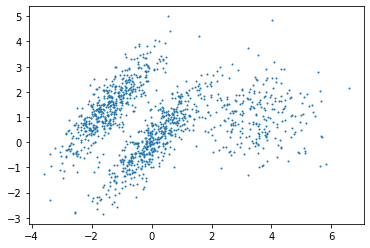

In [19]:
from sklearn.datasets import  make_blobs

X1,y1 = make_blobs(n_samples=1000,centers=((4,-4),(0,0)),random_state=42)
X1 = X1.dot(np.array([[0.374,0.95],[0.732,0.598]]))
X2,y2 = make_blobs(n_samples=250,centers=1,random_state=42)
X2=X2+[6,-8]
X = np.r_[X1,X2]
y = np.r_[y1,y2]
plot_clusters(X)

In [20]:
Kmaens_good = KMeans(n_clusters=3,init=np.array([[-1.5,2.5],[0.5,0],[4,0]]),n_init=1 ,random_state=42)
Kmaens_bad = KMeans(n_clusters=3,random_state=42)
Kmaens_good.fit(X)
Kmaens_bad.fit(X)

KMeans(n_clusters=3, random_state=42)

(1000, 1000)
(1000, 1000)


Text(0.5, 1.0, '2179.4842787447324')

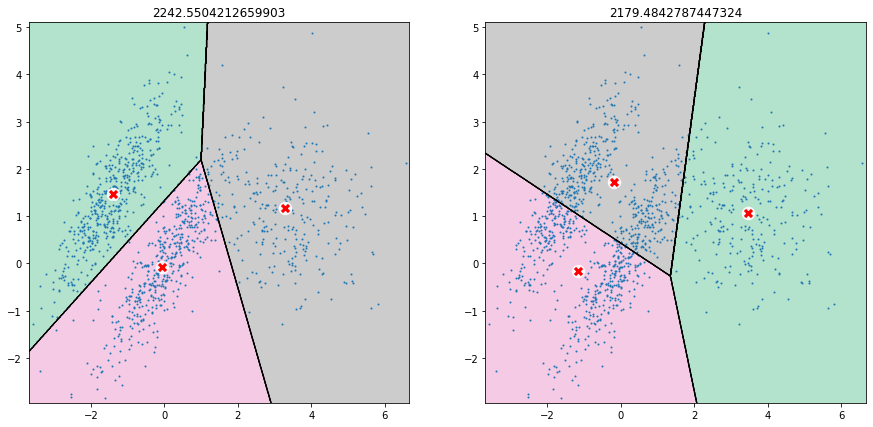

In [21]:
plt.figure(figsize=(15,7))
plt.subplot(121)
plot_decision(Kmaens_good,X)
plt.title(f'{Kmaens_good.inertia_}')
plt.subplot(122)
plot_decision(Kmaens_bad,X)
plt.title(f'{Kmaens_bad.inertia_}')

In [22]:
from matplotlib.image import imread
image = imread(r'D:\Project\python_pro\learn\2\1.jpg')
image.shape#(400, 600, 3)
image

array([[[105, 130,   3],
        [105, 130,   3],
        [104, 129,   2],
        ...,
        [144, 156,  94],
        [149, 159,  98],
        [152, 162, 101]],

       [[105, 130,   3],
        [105, 130,   3],
        [104, 129,   2],
        ...,
        [151, 161,  98],
        [155, 165, 104],
        [158, 168, 107]],

       [[105, 130,   3],
        [105, 130,   3],
        [104, 129,   2],
        ...,
        [158, 169, 103],
        [162, 172, 109],
        [165, 174, 111]],

       ...,

       [[126, 127,  34],
        [122, 126,  32],
        [119, 123,  29],
        ...,
        [110, 118, 103],
        [101, 111,  86],
        [ 57,  72,  13]],

       [[120, 124,  29],
        [119, 123,  28],
        [116, 120,  26],
        ...,
        [104, 113,  96],
        [ 97, 108,  78],
        [ 67,  83,  21]],

       [[119, 123,  26],
        [117, 121,  26],
        [115, 119,  24],
        ...,
        [ 62,  78,  16],
        [ 68,  86,  12],
        [ 55,  78,   0]]

In [23]:
X=image.reshape(-1,3)
kmeans = KMeans(n_clusters=8,random_state=42).fit(X)
#label为每个像素点的标签，这就是每个像素点的中心点位置,最后还原为原本形式
segmented_img = kmeans.cluster_centers_[kmeans.labels_].reshape(400, 600, 3)

In [24]:
from matplotlib.image import imread
image = imread(r'D:\Project\python_pro\learn\2\1.jpg')
image.shape#(400, 600, 3)
X=image.reshape(-1,3)
segmented_imgs = []
n_colors = (10,8,6,4,2)
for n_clusters in n_colors:
    km = KMeans(n_clusters=n_clusters,random_state=42).fit(X)
    segmented_img = km.cluster_centers_[km.labels_].astype(np.int32)#将每个像素点变为中心点的颜色--注意rgb的数据格式
    segmented_imgs.append(segmented_img.reshape(400, 600, 3))

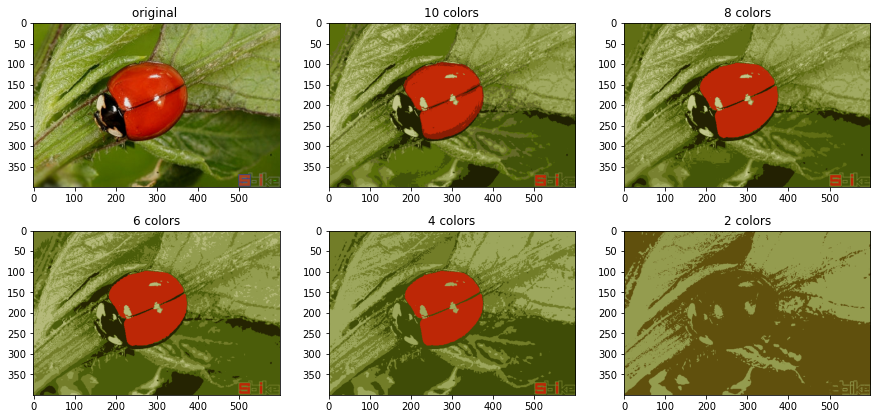

In [25]:
plt.figure(figsize=(15,7))
plt.subplot(231)
plt.title('original ')
plt.imshow(image)

for idx,n_clusters in enumerate(n_colors):
    plt.subplot(232+idx)
    plt.imshow(segmented_imgs[idx])
    plt.title(f'{n_clusters} colors')

# DBSCAN

In [26]:
from sklearn.datasets import  make_moons
X,y =make_moons(n_samples=1000,noise=0.05,random_state=42)

In [27]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.1,min_samples=5)
db.fit(X)

DBSCAN(eps=0.1)

In [28]:
db.core_sample_indices_[:10]#核心对象样本

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [29]:
np.unique(db.labels_)#显示蔟的个数

array([-1,  0,  1], dtype=int64)